# Keras Neural Network Model

## Import Required Libraries

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pynetlogo
import jpype
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

## Load and Prepare Data

In [2]:
# Reading in Data
df = pd.read_csv('soil_data_final.csv')

In [3]:
# Split the data into predictors and target
X = df[['om_r', 'sandtotal_r', 'silttotal_r', 'claytotal_r']]
y = df['ksat_r']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the Neural Network Model

In [32]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),   # Input layer shape based on features
    Dense(128, activation='relu'),      # Increased from 64 to 128 neurons
    Dropout(0.5),                       # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),       # Increased from 32 to 64 neurons
    Dense(1)                            # Output layer with 1 neuron for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

## Training the Model

In [33]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 112s 626us/step - loss: 1651.6862 - val_loss: 1466.0433
Epoch 2/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 110s 620us/step - loss: 1511.7058 - val_loss: 1436.5093
Epoch 3/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 628us/step - loss: 1489.1880 - val_loss: 1428.3344
Epoch 4/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 627us/step - loss: 1494.0490 - val_loss: 1449.0012
Epoch 5/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 629us/step - loss: 1480.0780 - val_loss: 1470.5088
Epoch 6/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 112s 630us/step - loss: 1478.3628 - val_loss: 1486.2766
Epoch 7/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 627us/step - loss: 1469.3956 - val_loss: 1458.8081
Epoch 8/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 113s 636us/step - loss: 1477.3992 - val_loss: 1462.6504
Epoch 9/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 628us/step - loss: 1479.2877 - val_loss: 1482.7993
Epoch 10/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 629us/step - loss: 1

177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 626us/step - loss: 1457.4076 - val_loss: 1544.8706
Epoch 61/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 112s 634us/step - loss: 1465.5444 - val_loss: 1527.7465
Epoch 62/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 627us/step - loss: 1440.8285 - val_loss: 1490.3729
Epoch 63/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 626us/step - loss: 1462.2866 - val_loss: 1514.1478
Epoch 64/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 112s 630us/step - loss: 1454.6589 - val_loss: 1507.7649
Epoch 65/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 110s 624us/step - loss: 1478.9636 - val_loss: 1545.1656
Epoch 66/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 625us/step - loss: 1477.2899 - val_loss: 1554.8947
Epoch 67/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 627us/step - loss: 1459.2522 - val_loss: 1556.0764
Epoch 68/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 112s 632us/step - loss: 1465.1849 - val_loss: 1571.0594
Epoch 69/100
177064/177064 ━━━━━━━━━━━━━━━━━━━━ 111s 626us/step - loss: 1462.

## Evaluate the Model

In [34]:
# Predicting on the test set
predictions = model.predict(X_test_scaled)

# Evaluating the model (e.g., using RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

29643/29643 ━━━━━━━━━━━━━━━━━━━━ 15s 493us/step
RMSE: 40.52006496010477


## Visualizing Training Performance

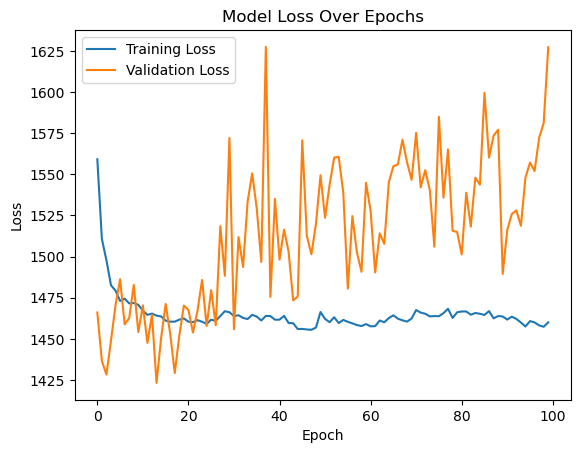

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## Prediction vs Actual Values

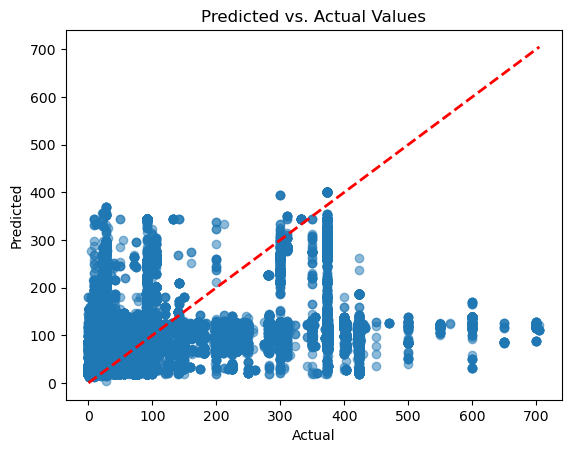

In [36]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.show()

## Saving the Model

In [86]:
save_model(model, 'soil_model.keras')

# NetLogo Integration

## Loading in the Model

In [12]:
model_path = 'GroundwaterFlow.nlogo3d'

netlogo = pynetlogo.NetLogoLink(gui=True,
                                thd=True,
                                jvm_path = "C:\Program Files\Eclipse Adoptium\jdk-11.0.22.7-hotspot\\bin\server\jvm.dll")

netlogo.load_model(model_path)

netlogo.command('clear-all')
netlogo.command('setup')

## Model Initialization

### Asking for User Inputs

In [77]:
user_clay_value = int(input("Amount clay: "))

Amount clay: 100


In [73]:
user_sand_value = int(input("Amount sand: "))

Amount sand: 0


In [78]:
user_silt_value = int(input("Amount silt: "))

Amount silt: 0


In [53]:
user_om_value = float(input("Amount organic matter: "))

Amount organic matter: 2.9


### Running this through the Neural Network

In [88]:
user_inputs = {
    'om_r': [user_om_value],
    'sandtotal_r': [user_sand_value],
    'silttotal_r': [user_silt_value],
    'claytotal_r': [user_clay_value],
}

user_input_df = pd.DataFrame(data=user_inputs)

# Scaling Input
user_input_scaled = scaler.transform(user_input_df)

In [80]:
predicted_ksat = model.predict(user_input_scaled)
print("Predicted ksat value:", predicted_ksat[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted ksat value: 34.818443


### Model Environment

In [19]:
user_rain_value = float(input("Amount rainfall: "))

Amount rainfall: 2.0


In [89]:
user_slope_value = float(input("Soil slope angle: "))

Soil slope angle: 34


In [90]:
# Soil Textures
netlogo.command(f'set clay {user_clay_value}')
netlogo.command(f'set sand {user_sand_value}')
netlogo.command(f'set silt {user_silt_value}')

# Organic Matter
netlogo.command(f'set org_matter {user_om_value}')

# Rainfall
netlogo.command(f'set rain {user_rain_value}')

# Slope
netlogo.command(f'set slope-angle {user_slope_value}')

## Running the Model

In [21]:
while True:
    netlogo.command('repeat 10 [ go ]')

KeyboardInterrupt: 

In [92]:
# Retrieving Value Test
clay_value = netlogo.report('clay')
print('The value of clay in the NetLogo model is:', clay_value)

The value of clay in the NetLogo model is: 75.0
